In [7]:
source('/home/akananth/Misc/Research-Jam-2023/effect_estimate_helper.R')

In [8]:
df = fread('data/final_samples/final_regression_data.tsv', sep='\t')
nrow(df)

In [3]:
df$above_mean_markers <- df$parent_num_markers > mean(df$parent_num_markers,na.rm=T)
df$above_mean_formality <- df$parent_formality > mean(df$parent_formality,na.rm=T)

## Figure 1 - Above/Below Mean

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using formula = 'y ~ x'


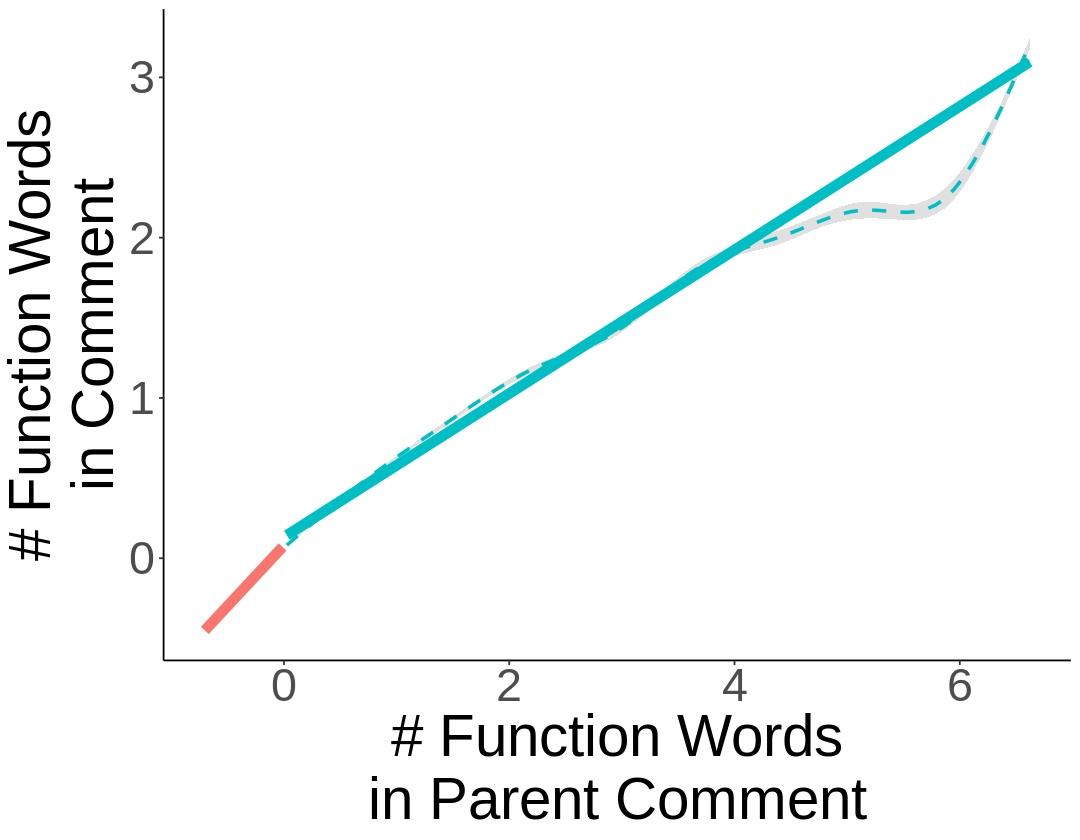

In [4]:
set.seed(seeds[8])

sub <- df %>% sample_n(1000000) %>% mutate(style = num_markers,
                                           parent_style = parent_num_markers,
                                           category = above_mean_markers)
mod <- lmer(mixed_mod_equation_cat, sub)
saveRDS(mod, paste0(reg_dir, 'function_lsm.RDS'))

options(repr.plot.width = 9, repr.plot.height = 7)
ggplot(sub, 
       aes(x = parent_num_markers, y = num_markers, color = above_mean_markers)) +
    geom_smooth(linetype='dashed', alpha=0.3) +
    geom_smooth(method='lm', linewidth=3) +
    labs(x = '# Function Words\nin Parent Comment',
         y = '# Function Words\nin Comment') +
    theme_classic() +
    theme(legend.position='none',
          text = element_text(size = 35))
ggsave(paste0(plot_dir,'function_lsm.pdf'), width = 9, height = 7)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 2494 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2494 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 2494 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2494 rows containing non-finite values (`stat_smooth()`).”


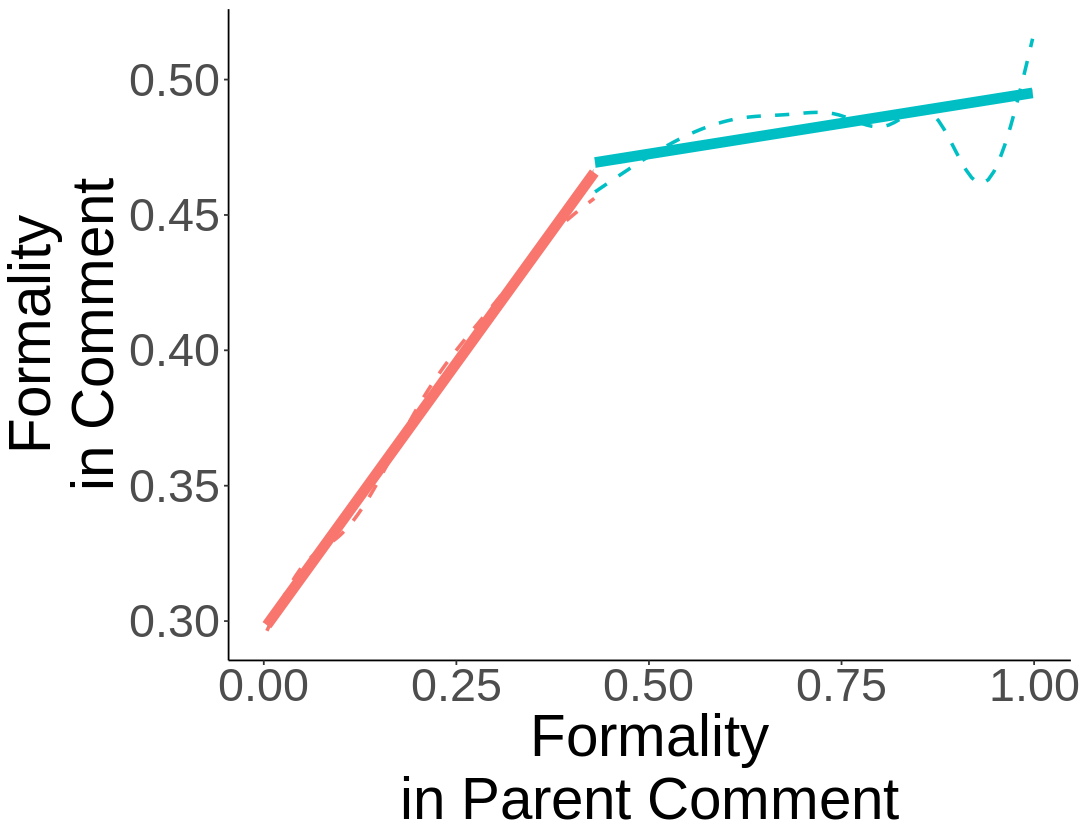

In [5]:
set.seed(seeds[9])

sub <- df %>% sample_n(1000000) %>% mutate(style = formality,
                                           parent_style = parent_formality,
                                           category = above_mean_formality)
mod <- lmer(mixed_mod_equation_cat, sub)
saveRDS(mod, paste0(reg_dir, 'formality_lsm.RDS'))

options(repr.plot.width = 9, repr.plot.height = 7)
ggplot(df %>% sample_n(1000000), 
       aes(x = parent_formality, y = formality, color = above_mean_formality)) +
    geom_smooth(linetype='dashed', se=F) +
    geom_smooth(method='lm', linewidth=3) +
    labs(x = 'Formality\nin Parent Comment',
         y = 'Formality\nin Comment') +
    theme_classic() +
    theme(legend.position='none',
          text = element_text(size = 35))
ggsave(paste0(plot_dir,'formality_lsm.pdf'), width = 9, height = 7)

# Correlation

In [ ]:
set.seed(seeds[55])

functionwords <- c()
formalitystyle <- c()
for(i in 1:1000){
    if(i %% 10 == 1) message(i)
    sub = df %>% sample_n(10000)
    
    sub$style <- sub$num_markers
    sub$parent_style <- sub$parent_num_markers
    mod <- lmer(mixed_mod_equation, sub)
    functionwords <- c(functionwords,
                       unname(fixef(mod)['parent_style']))
    
    sub$style <- sub$formality
    sub$parent_style <- sub$parent_formality
    mod <- lmer(mixed_mod_equation, sub)
    formalitystyle <- c(formalitystyle,
                        unname(fixef(mod)['parent_style']))
    
}

cor_df = data.frame(functionwords = functionwords, formality = formalitystyle)
write.csv(cor_df, paste0(data_dir,'function_formality_correlation.csv'), row.names=F)

1

11

21

31

41

51

61

71

81

91

101

111

121

131

141

151

161

171

181

191

201

211

221

231

241

251

261

271

281

291

301

311

321

331

341

351

361

371

381

391

401

411

421

431

441

451

461

471

481

491

501

511

521

531

541

551

561

571

581

591

601

611

621

631

641

651

661

671



In [26]:
cor_df <- read.csv(paste0(data_dir,'function_formality_correlation.csv'))
cor(cor_df$functionwords, cor_df$formality)

[1] -0.02125883

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


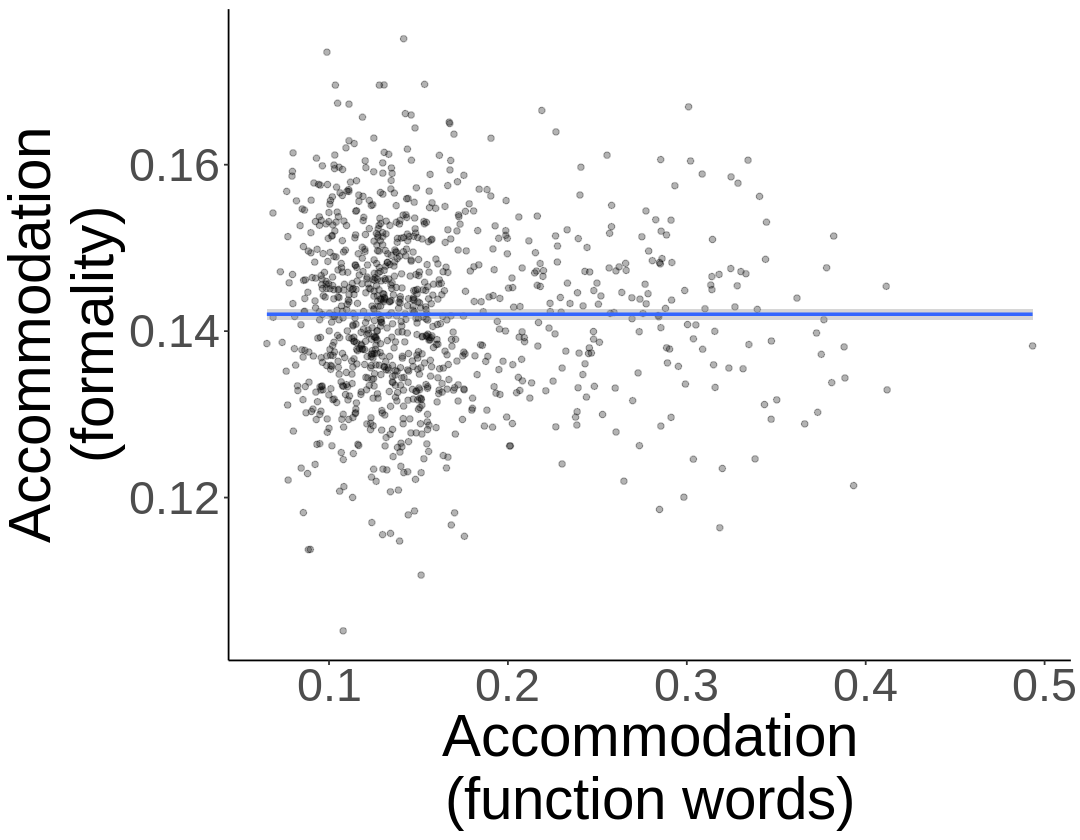

In [28]:
options(repr.plot.width = 9, repr.plot.height = 7)
ggplot(cor_df, aes(x = functionwords, y=formality)) +
    geom_point(alpha = 0.3) +
    geom_smooth() +
    labs(x = 'Accommodation\n(function words)', y = 'Accommodation\n(formality)') +
    #scale_x_continuous(limits = c(0.08,0.35)) +
    theme_classic() +
    theme(text = element_text(size = 35))

## Figure 3 - Subreddit

In [6]:
table(df$subreddit_category)


            animals          discussion           education       entertainment 
              17163              118738              116627             1185770 
    general_content hobbies_occupations               humor           lifestyle 
              64809              171326              250894             1216494 
              other          technology 
           13433903              317289 

In [7]:
set.seed(seeds[11])
df$style <- df$num_markers
df$parent_style <- df$parent_num_markers
df$category <- df$subreddit_category

plot_df <- data.frame()
sub = df %>% sample_n(1000000)
for(l in sort(unique(df$category))){
    #message(paste(Sys.time(),l))
    m <- lm(simple_mod_equation_cat, 
            sub %>% mutate(category = relevel(factor(category),l)))
    plot_df <- rbind(plot_df,
                     data.frame(level=paste0(l,"\n(n=",scales::label_comma()(sum(df$category==l,na.rm=T)),")"), 
                                coef=summary(m)$coefficients['parent_style',1], 
                                se = summary(m)$coefficients['parent_style',2])
                    )
}
plot_df$lo = plot_df$coef - 1.96*plot_df$se
plot_df$hi = plot_df$coef + 1.96*plot_df$se

func_df = plot_df
fwrite(func_df, paste0(data_dir,'function_subreddit.csv'), row.names=F)

m <- lm(simple_mod_equation_cat, sub)
saveRDS(m, paste0(reg_dir, 'function_subreddit.RDS'))
rm(sub)

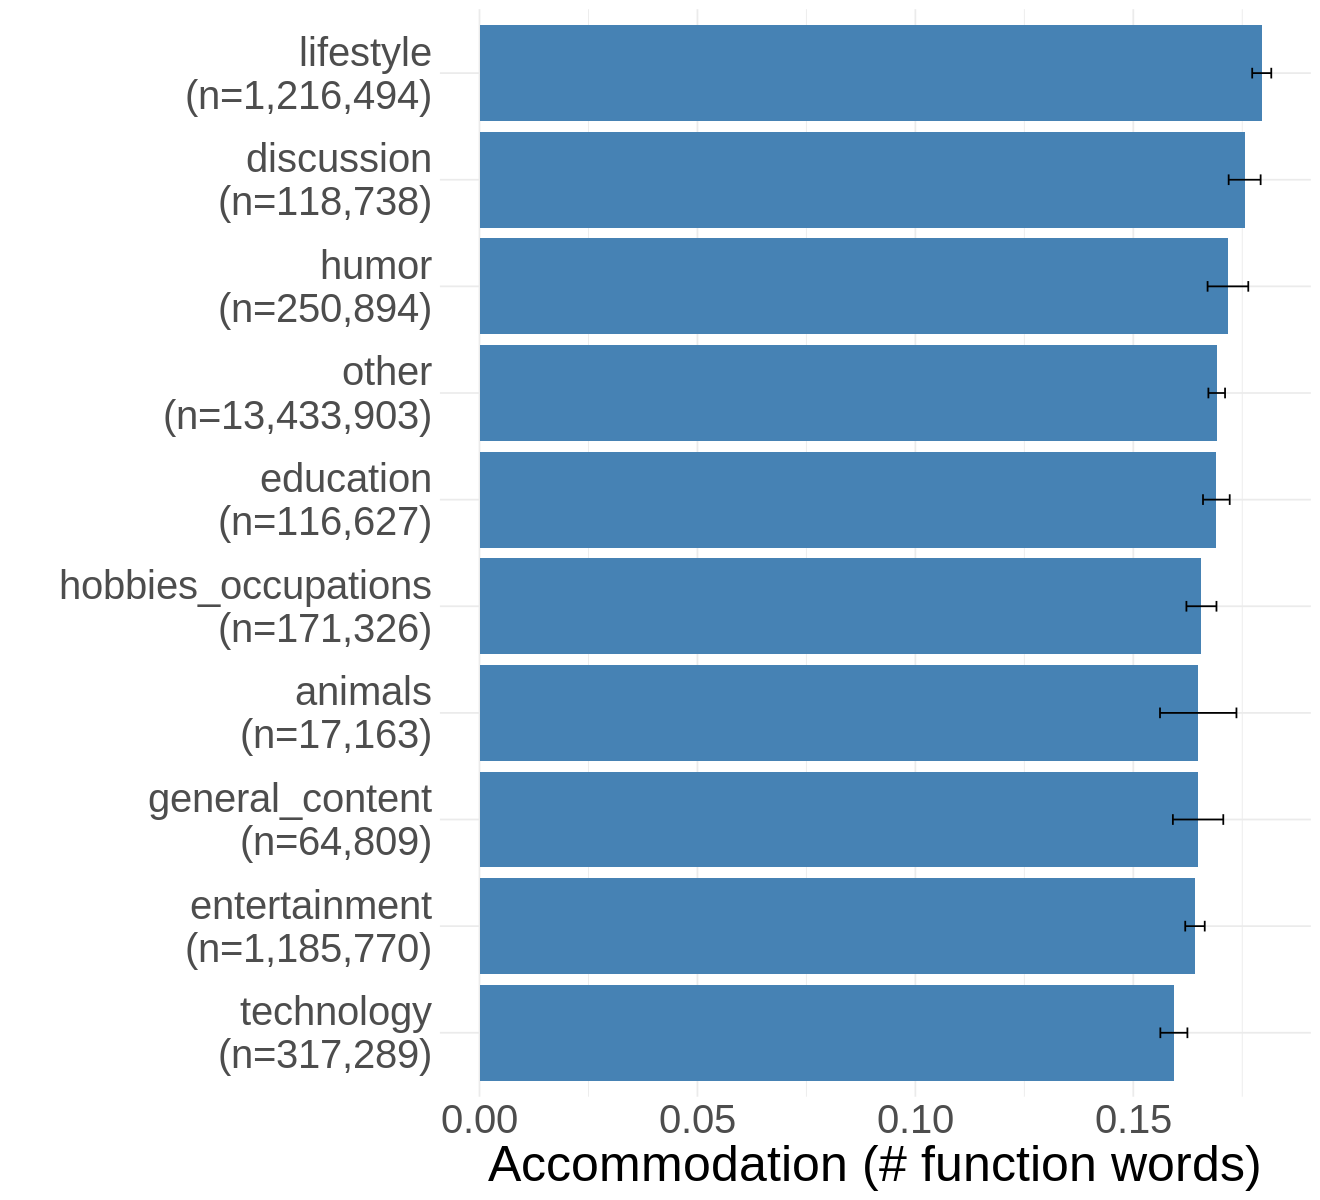

In [8]:
func_df = fread(paste0(data_dir,'function_subreddit.csv'))

options(repr.plot.width = 11, repr.plot.height = 10)
ggplot(func_df, aes(x=reorder(level, coef), y=coef, ymin=lo, ymax=hi)) +
    geom_col(fill = 'steelblue') +
    geom_errorbar(width=0.1) +
    coord_flip() +
    labs(x = '', y = 'Accommodation (# function words)') +
    theme_minimal() +
    theme(text = element_text(size = 30))

In [9]:
set.seed(seeds[10])
df$style <- df$formality
df$parent_style <- df$parent_formality
df$category <- df$subreddit_category

plot_df <- data.frame()
sub = df %>% sample_n(1000000)
for(l in sort(unique(df$category))){
    message(paste(Sys.time(),l))
    m <- lm(simple_mod_equation_cat, 
            sub %>% mutate(category = relevel(factor(category),l)))
    plot_df <- rbind(plot_df,
                     data.frame(level=paste0(l,"\n(n=",scales::label_comma()(sum(df$category==l,na.rm=T)),")"), 
                                coef=summary(m)$coefficients['parent_style',1], 
                                se = summary(m)$coefficients['parent_style',2])
                    )
}
plot_df$lo = plot_df$coef - 1.96*plot_df$se
plot_df$hi = plot_df$coef + 1.96*plot_df$se

form_df = plot_df
fwrite(form_df, paste0(data_dir,'formality_subreddit.csv'), row.names=F)

m <- lm(simple_mod_equation_cat, sub)
saveRDS(m, paste0(reg_dir, 'formality_subreddit.RDS'))
rm(sub)

2023-06-05 02:05:39 animals

2023-06-05 02:05:41 discussion

2023-06-05 02:05:43 education

2023-06-05 02:05:46 entertainment

2023-06-05 02:05:52 general_content

2023-06-05 02:05:54 hobbies_occupations

2023-06-05 02:05:57 humor

2023-06-05 02:06:03 lifestyle

2023-06-05 02:06:05 other

2023-06-05 02:06:06 technology



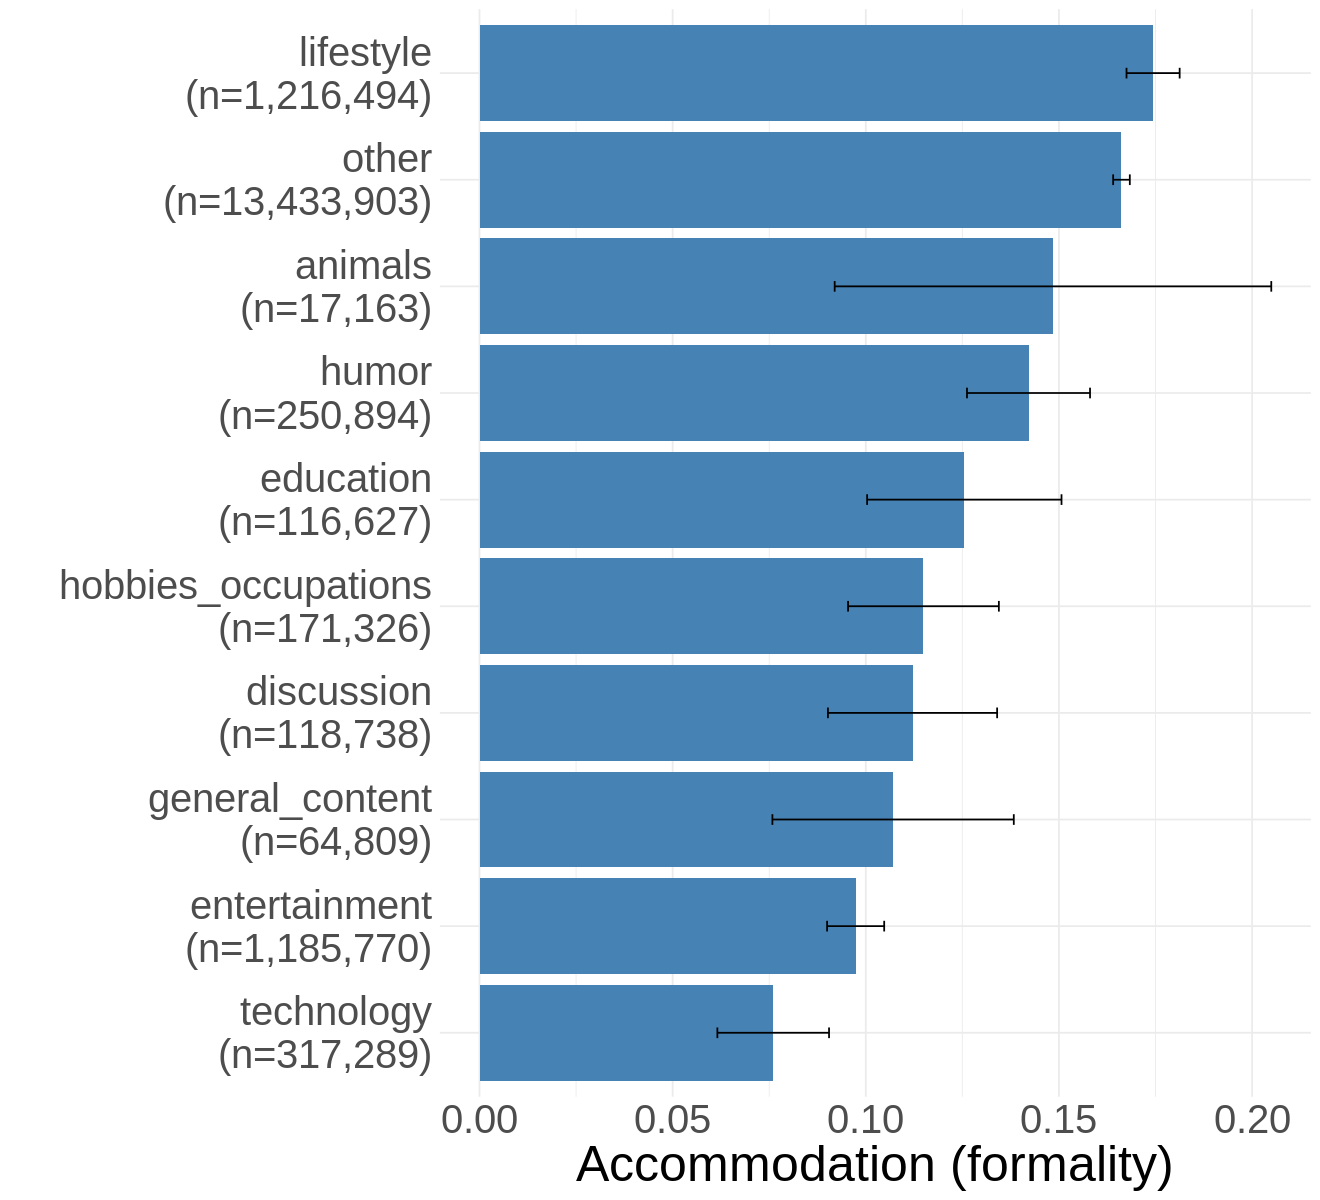

In [10]:
form_df = fread(paste0(data_dir,'formality_subreddit.csv'))

options(repr.plot.width = 11, repr.plot.height = 10)
ggplot(form_df, aes(x=reorder(level, coef), y=coef, ymin=lo, ymax=hi)) +
    geom_col(fill = 'steelblue') +
    geom_errorbar(width=0.1) +
    coord_flip() +
    labs(x = '', y = 'Accommodation (formality)') +
    theme_minimal() +
    theme(text = element_text(size = 30))

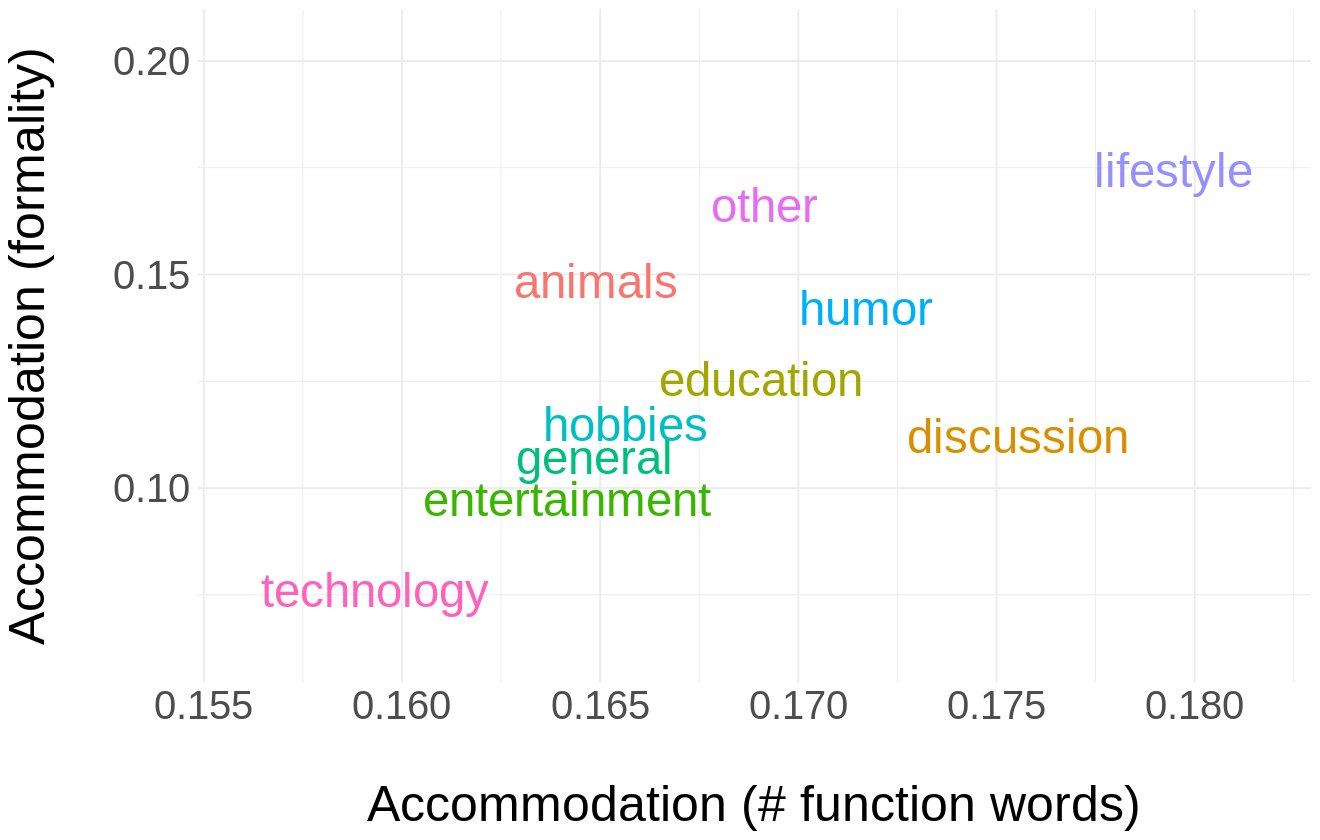

In [11]:
func_df = fread(paste0(data_dir,'function_subreddit.csv'))
form_df = fread(paste0(data_dir,'formality_subreddit.csv'))
plot_df = merge(form_df, func_df, by='level', suffixes=c('.form','.func'))

options(repr.plot.width = 11, repr.plot.height = 7)
ggplot(plot_df, aes(x=coef.func, xmin=lo.func, xmax=hi.func, 
                    y=coef.form, ymin=lo.form, ymax=hi.form, 
                    color = level, label = gsub('\n.*|_.*','',level))) +
    #geom_point() +
    #geom_errorbar(width = 0.1, height = 0.1) +
    geom_text(size = 10) +
    labs(x = '\nAccommodation (# function words)', 
         y = 'Accommodation (formality)\n') +
    theme_minimal() +
    theme(legend.position = 'none',
          text = element_text(size = 30))
ggsave(paste0(plot_dir,'subreddit_lsm.pdf'), width = 11, height = 7)

## Figure 4 - Entropy

In [12]:
entropy = read.table('data/entropy/2019_subreddit_entropies.tsv', sep='\t', header=T)
head(entropy)

,subreddit,Mean.Entropy,Sum.Entropy,Total.Subscribers
,<chr>,<dbl>,<dbl>,<int>
1,3Dprinting,3.214517,221.8017,456770
2,4chan,2.598331,179.2848,1145910
3,ADHD,3.289610,226.9831,721919
4,AMA,3.314779,228.7198,528592
5,Anticonsumption,3.117201,215.0868,216158
6,Anxiety,3.413375,235.5229,349308


In [13]:
summary(lm(Mean.Entropy ~ Total.Subscribers, entropy))


Call:
lm(formula = Mean.Entropy ~ Total.Subscribers, data = entropy)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27121 -0.36349  0.00819  0.30504  2.16568 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.980e+00  3.542e-02  84.133   <2e-16 ***
Total.Subscribers 7.973e-09  9.632e-09   0.828    0.408    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5559 on 278 degrees of freedom
Multiple R-squared:  0.002459,	Adjusted R-squared:  -0.001129 
F-statistic: 0.6853 on 1 and 278 DF,  p-value: 0.4085


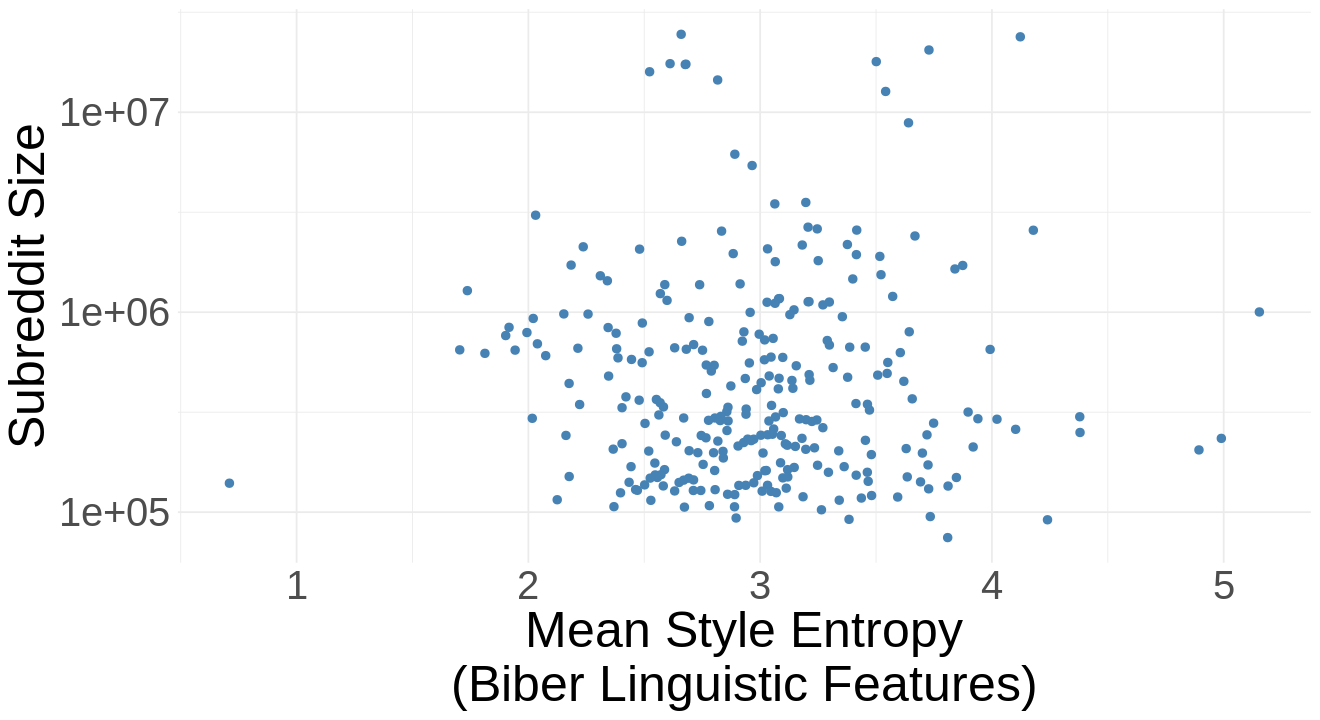

In [14]:
options(repr.plot.width = 11, repr.plot.height = 6)

ggplot(entropy, aes(x=Mean.Entropy, y=Total.Subscribers)) +
    geom_point(size = 2, color='steelblue') +
    #geom_smooth(method='lm') +
    labs(x = 'Mean Style Entropy\n(Biber Linguistic Features)', 
         y = 'Subreddit Size') +
    scale_y_continuous(trans='log10') +
    theme_minimal() +
    theme(legend.position = 'none',
          text = element_text(size = 30))
ggsave(paste0(plot_dir,'subreddit_entropy.pdf'), width = 11, height = 6)

# Test Effects

### Figure 1 - Above/Below Mean

In [15]:
summary(readRDS('results/reg_models/function_lsm.RDS'))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: mixed_mod_equation_cat
   Data: sub

REML criterion at convergence: -958551

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-49.208  -0.319  -0.006   0.341  14.225 

Random effects:
 Groups       Name        Variance Std.Dev.
 subreddit_re (Intercept) 0.001101 0.03319 
 Residual                 0.022156 0.14885 
Number of obs: 1000000, groups:  subreddit_re, 23022

Fixed effects:
                            Estimate Std. Error         df  t value Pr(>|t|)
(Intercept)                5.651e-03  5.737e-04  6.149e+04    9.850  < 2e-16
parent_style               1.546e-01  1.310e-03  9.997e+05  117.978  < 2e-16
categoryTRUE              -6.413e-03  5.641e-04  9.965e+05  -11.370  < 2e-16
num_tokens                 9.813e-01  1.770e-04  9.999e+05 5544.902  < 2e-16
parent_num_tokens         -1.262e-01  9.461e-04  9.998e+05 -133.354  < 2e-16
depth                      9.059e-05  2.351e-05

In [16]:
summary(readRDS('results/reg_models/formality_lsm.RDS'))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: mixed_mod_equation_cat
   Data: sub

REML criterion at convergence: 469867

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5755 -0.7700 -0.2754  0.6970  2.8981 

Random effects:
 Groups       Name        Variance Std.Dev.
 subreddit_re (Intercept) 0.005997 0.07744 
 Residual                 0.092339 0.30387 
Number of obs: 997551, groups:  subreddit_re, 23051

Fixed effects:
                            Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)                3.627e-01  1.129e-03  5.063e+04  321.13   <2e-16 ***
parent_style               1.996e-01  3.412e-03  9.975e+05   58.50   <2e-16 ***
categoryTRUE               5.872e-02  2.076e-03  9.965e+05   28.28   <2e-16 ***
num_tokens                 3.478e-02  3.608e-04  9.975e+05   96.38   <2e-16 ***
parent_num_tokens          6.943e-03  3.667e-04  9.975e+05   18.93   <2e-16 ***
depth                     -8.13

### Figure 3 - Subreddit

In [17]:
summary(readRDS('results/reg_models/function_subreddit.RDS'))


Call:
lm(formula = simple_mod_equation_cat, data = sub)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3283 -0.0455  0.0001  0.0512  1.6977 

Coefficients:
                                           Estimate Std. Error  t value
(Intercept)                               2.127e-02  4.877e-03    4.362
parent_style                              1.649e-01  4.474e-03   36.854
categorydiscussion                        2.319e-03  5.217e-03    0.444
categoryeducation                        -1.863e-02  5.265e-03   -3.539
categoryentertainment                    -2.681e-02  4.910e-03   -5.461
categorygeneral_content                  -2.394e-02  5.476e-03   -4.371
categoryhobbies_occupations              -3.090e-02  5.111e-03   -6.046
categoryhumor                            -1.823e-02  5.091e-03   -3.581
categorylifestyle                        -4.783e-03  4.910e-03   -0.974
categoryother                            -2.239e-02  4.879e-03   -4.588
categorytechnology                       -

In [18]:
summary(readRDS('results/reg_models/formality_subreddit.RDS'))


Call:
lm(formula = simple_mod_equation_cat, data = sub)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82836 -0.24876 -0.09121  0.22625  0.72598 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                               4.032e-01  1.712e-02  23.557  < 2e-16
parent_style                              1.485e-01  2.883e-02   5.149 2.62e-07
categorydiscussion                        2.215e-02  1.841e-02   1.203 0.228942
categoryeducation                         6.513e-02  1.909e-02   3.412 0.000645
categoryentertainment                    -2.484e-02  1.723e-02  -1.442 0.149436
categorygeneral_content                   1.764e-02  1.933e-02   0.913 0.361413
categoryhobbies_occupations              -3.358e-03  1.805e-02  -0.186 0.852374
categoryhumor                            -6.537e-02  1.756e-02  -3.722 0.000198
categorylifestyle                        -7.519e-02  1.721e-02  -4.369 1.25e-05
categoryother           